# Random Forest

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif

### Model 1
#### Read CSV

In [2]:
train_m1 = pd.read_csv('../../../../Data_AA2/train_m1.csv', sep = ',')
train_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,-0.756929,-1.925779,0.580938,-0.515445,0.939376,-0.453565,-0.763196,1.192581,0.001762,...,-0.561357,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.259352,0.395979,0
1,0.37521,1.471189,-0.283258,-0.824024,-0.515445,0.939376,-0.453565,1.310279,-0.098471,-0.713715,...,0.148956,0.196894,-0.348973,0.188003,0.837519,1.529013,-0.281151,0.769787,0.843536,0
2,0.37521,0.078615,-0.283258,1.049258,-0.515445,0.939376,-0.453565,-0.763196,-1.389523,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.773829,0.843536,0
3,0.37521,-0.756929,-0.283258,-0.824024,-0.515445,-1.090085,-0.453565,1.310279,1.192581,1.432715,...,-0.206200,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.284758,0.395979,0
4,0.37521,-1.035444,-1.925779,1.049258,1.938451,0.939376,-0.453565,1.310279,0.762230,-0.713715,...,0.859269,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0


In [3]:
test_m1 = pd.read_csv('../../../../Data_AA2/test_m1.csv', sep = ',')
test_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,1.471189,-0.283258,0.580938,-0.515445,0.939376,-0.453565,1.310279,0.762230,0.717238,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0
1,0.37521,0.914159,-1.925779,-0.355703,-0.515445,-1.090085,-0.453565,1.310279,0.762230,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.709736,0.329470,0
2,0.37521,1.471189,-0.283258,0.580938,1.938451,0.939376,-0.453565,1.310279,0.762230,-1.429191,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.711468,0.329470,0
3,0.37521,-0.756929,1.359263,-1.760665,-0.515445,-1.090085,-0.453565,-0.763196,0.762230,1.432715,...,-0.561357,0.196894,1.662067,-2.562036,-1.202130,-1.180338,-1.231682,-1.354522,-0.943918,0
4,0.37521,-1.035444,-0.283258,1.049258,1.938451,0.939376,-0.453565,-0.763196,-1.389523,0.717238,...,0.148956,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.771519,0.843536,0


In [4]:
#get target
train_m1_target = train_m1['y']
train_m1 = train_m1.drop(columns=['y'])

In [5]:
#get target
test_m1_target = test_m1['y']
test_m1 = test_m1.drop(columns=['y'])

### Check for lower errors

In [6]:
error_rate = []

for i in tqdm(range(1,200)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m1,train_m1_target)
    predictions = clf.predict(test_m1)
    error_rate.append(np.mean(predictions != test_m1_target))

100%|████████████████████████████████████████████████████████████████████████████████| 199/199 [09:22<00:00,  2.83s/it]


Text(0, 0.5, 'Error Rate')

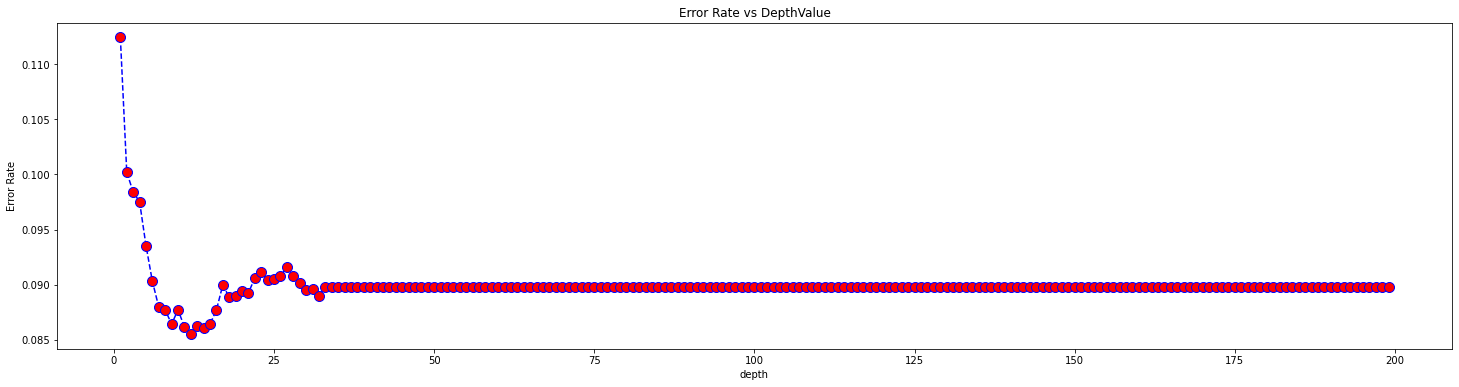

In [7]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [8]:
# Create the parameter grid based on the results of random search 
# There are more parameters but they are focusing only in one class to get the best accuracy overall

parameters = {
    'bootstrap': [True,False],
    'max_depth': [11,12,13,14],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_rf.fit(train_m1, train_m1_target)

print (opt_model_rf.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START bootstrap=True, max_depth=11, n_estimators=100.............
[CV 1/5; 1/32] END bootstrap=True, max_depth=11, n_estimators=100; total time=   1.3s
[CV 2/5; 1/32] START bootstrap=True, max_depth=11, n_estimators=100.............
[CV 2/5; 1/32] END bootstrap=True, max_depth=11, n_estimators=100; total time=   1.2s
[CV 3/5; 1/32] START bootstrap=True, max_depth=11, n_estimators=100.............
[CV 3/5; 1/32] END bootstrap=True, max_depth=11, n_estimators=100; total time=   1.5s
[CV 4/5; 1/32] START bootstrap=True, max_depth=11, n_estimators=100.............
[CV 4/5; 1/32] END bootstrap=True, max_depth=11, n_estimators=100; total time=   1.6s
[CV 5/5; 1/32] START bootstrap=True, max_depth=11, n_estimators=100.............
[CV 5/5; 1/32] END bootstrap=True, max_depth=11, n_estimators=100; total time=   1.6s
[CV 1/5; 2/32] START bootstrap=True, max_depth=11, n_estimators=200.............
[CV 1/5; 2/32] END boo

[CV 5/5; 10/32] END bootstrap=True, max_depth=13, n_estimators=200; total time=   4.2s
[CV 1/5; 11/32] START bootstrap=True, max_depth=13, n_estimators=300............
[CV 1/5; 11/32] END bootstrap=True, max_depth=13, n_estimators=300; total time=   6.7s
[CV 2/5; 11/32] START bootstrap=True, max_depth=13, n_estimators=300............
[CV 2/5; 11/32] END bootstrap=True, max_depth=13, n_estimators=300; total time=   6.4s
[CV 3/5; 11/32] START bootstrap=True, max_depth=13, n_estimators=300............
[CV 3/5; 11/32] END bootstrap=True, max_depth=13, n_estimators=300; total time=   6.2s
[CV 4/5; 11/32] START bootstrap=True, max_depth=13, n_estimators=300............
[CV 4/5; 11/32] END bootstrap=True, max_depth=13, n_estimators=300; total time=   6.3s
[CV 5/5; 11/32] START bootstrap=True, max_depth=13, n_estimators=300............
[CV 5/5; 11/32] END bootstrap=True, max_depth=13, n_estimators=300; total time=   6.3s
[CV 1/5; 12/32] START bootstrap=True, max_depth=13, n_estimators=1000....

[CV 4/5; 20/32] END bootstrap=False, max_depth=11, n_estimators=1000; total time=  18.6s
[CV 5/5; 20/32] START bootstrap=False, max_depth=11, n_estimators=1000..........
[CV 5/5; 20/32] END bootstrap=False, max_depth=11, n_estimators=1000; total time=  18.6s
[CV 1/5; 21/32] START bootstrap=False, max_depth=12, n_estimators=100...........
[CV 1/5; 21/32] END bootstrap=False, max_depth=12, n_estimators=100; total time=   1.8s
[CV 2/5; 21/32] START bootstrap=False, max_depth=12, n_estimators=100...........
[CV 2/5; 21/32] END bootstrap=False, max_depth=12, n_estimators=100; total time=   1.9s
[CV 3/5; 21/32] START bootstrap=False, max_depth=12, n_estimators=100...........
[CV 3/5; 21/32] END bootstrap=False, max_depth=12, n_estimators=100; total time=   1.9s
[CV 4/5; 21/32] START bootstrap=False, max_depth=12, n_estimators=100...........
[CV 4/5; 21/32] END bootstrap=False, max_depth=12, n_estimators=100; total time=   1.8s
[CV 5/5; 21/32] START bootstrap=False, max_depth=12, n_estimators

[CV 3/5; 30/32] END bootstrap=False, max_depth=14, n_estimators=200; total time=   4.1s
[CV 4/5; 30/32] START bootstrap=False, max_depth=14, n_estimators=200...........
[CV 4/5; 30/32] END bootstrap=False, max_depth=14, n_estimators=200; total time=   4.4s
[CV 5/5; 30/32] START bootstrap=False, max_depth=14, n_estimators=200...........
[CV 5/5; 30/32] END bootstrap=False, max_depth=14, n_estimators=200; total time=   4.5s
[CV 1/5; 31/32] START bootstrap=False, max_depth=14, n_estimators=300...........
[CV 1/5; 31/32] END bootstrap=False, max_depth=14, n_estimators=300; total time=   6.7s
[CV 2/5; 31/32] START bootstrap=False, max_depth=14, n_estimators=300...........
[CV 2/5; 31/32] END bootstrap=False, max_depth=14, n_estimators=300; total time=   6.4s
[CV 3/5; 31/32] START bootstrap=False, max_depth=14, n_estimators=300...........
[CV 3/5; 31/32] END bootstrap=False, max_depth=14, n_estimators=300; total time=   6.3s
[CV 4/5; 31/32] START bootstrap=False, max_depth=14, n_estimators=3

#### Create and fit the model

In [15]:
# Create model with best parameters
rf_best_model = RandomForestClassifier(max_depth=11, n_estimators=200)

# Fit the best model
rf_best_model.fit(train_m1, train_m1_target)
rf_best_model

RandomForestClassifier(max_depth=11, n_estimators=200)

In [16]:
predictions = rf_best_model.predict(test_m1)

# Confusion matrix
confusion = pd.crosstab(test_m1_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0    1    All
Actual                      
0          10718  250  10968
1            826  563   1389
All        11544  813  12357


In [17]:
# Accuracy
score = accuracy_score(test_m1_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.912924


In [18]:
# Report
print(classification_report(test_m1_target,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.69      0.41      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.81      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [19]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m1, train_m1_target, cv = 5).mean()
pecc_rf

0.908986879250843

### Model 2
#### Read CSV

In [20]:
train_m2 = pd.read_csv('../../../../Data_AA2/train_m2.csv', sep = ',')
train_m2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.836283,-1.028419,-1.910223,-0.420230,-0.009681,0.917326,-0.43243,-0.699689,1.145570,-0.014944,...,-0.187885,0.213335,-0.373253,0.190666,-0.011801,-0.548958,-0.289686,0.352458,0.470978,0
1,0.406241,-1.028419,1.292265,1.086428,-0.009681,-1.090125,-0.43243,-0.699689,-1.366988,1.415229,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,-0.132418,0.937972,0.851480,0.899436,0
2,0.406241,0.353247,-1.910223,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-0.529469,0.700143,...,-0.187885,0.213335,-0.373253,0.190666,0.919127,0.676764,-0.435341,0.849794,0.899436,0
3,0.406241,-0.475752,-0.308979,1.086428,-0.009681,-1.090125,-0.43243,-0.699689,-0.529469,1.415229,...,0.549049,0.213335,-0.373253,0.190666,0.919127,0.676764,-0.435341,0.850918,0.899436,0
4,0.406241,0.076914,-0.308979,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-1.366988,0.700143,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,-0.132418,0.937972,0.852604,0.899436,0


In [21]:
test_m2 = pd.read_csv('../../../../Data_AA2/test_m2.csv', sep = ',')
test_m2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.406241,-0.752086,1.292265,-0.922449,-0.009681,0.917326,-0.43243,1.429206,-0.110709,-0.014944,...,2.759852,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.796408,0.899436,0
1,0.406241,1.458580,1.292265,0.584209,-0.009681,0.917326,-0.43243,1.429206,-0.110709,1.415229,...,0.180582,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.848670,0.899436,0
2,0.406241,-0.475752,-0.308979,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-1.785748,1.415229,...,-0.556353,0.213335,3.485114,-2.416003,-1.066853,-0.762350,-1.350882,-1.142923,-0.811744,0
3,0.406241,-0.752086,-1.910223,-0.420230,-0.009681,0.917326,-0.43243,1.429206,-0.110709,1.415229,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.848670,0.899436,0
4,0.406241,0.076914,-0.308979,0.584209,-0.009681,-1.090125,-0.43243,1.429206,0.726810,-1.445118,...,-0.556353,0.213335,-0.373253,0.190666,0.732941,0.806507,0.875548,0.792474,0.407306,0


In [22]:
#get target
train_m2_target = train_m2['y']
train_m2 = train_m2.drop(columns=['y'])

In [23]:
#get target
test_m2_target = test_m2['y']
test_m2 = test_m2.drop(columns=['y'])

### Check for lower errors

In [24]:
error_rate = []

for i in tqdm(range(1,100)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m2,train_m2_target)
    predictions = clf.predict(test_m2)
    error_rate.append(np.mean(predictions != test_m2_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [03:08<00:00,  1.91s/it]


Text(0, 0.5, 'Error Rate')

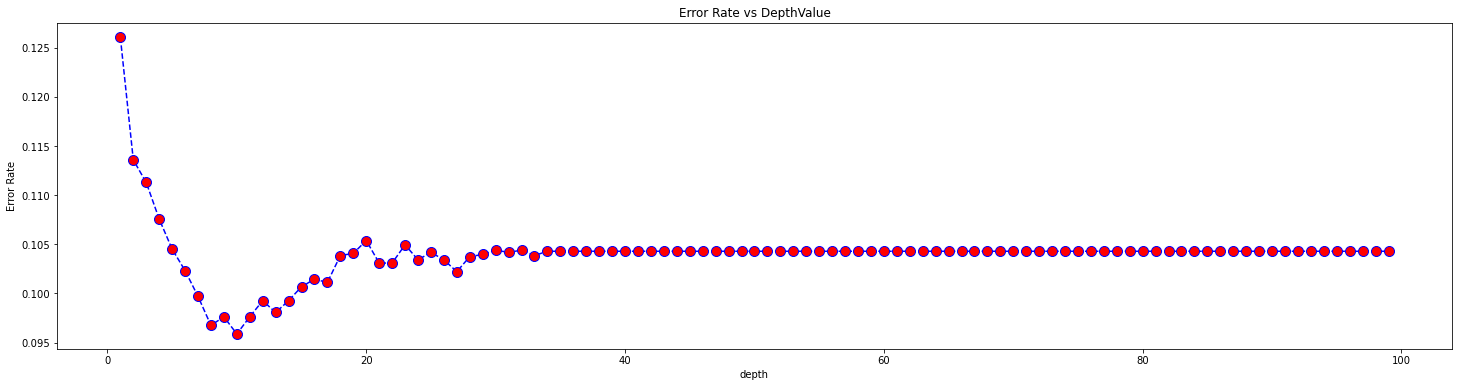

In [25]:
plt.figure(figsize=(25,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [27]:
# Create the parameter grid based on the results of random search 
# There are more parameters but they are focusing only in one class to get the best accuracy overall

parameters = {
    'bootstrap': [True,False],
    'max_depth': [8,9,10,11],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_rf.fit(train_m2, train_m2_target)

print (opt_model_rf.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 1/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   0.8s
[CV 2/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 2/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   0.8s
[CV 3/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 3/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   1.0s
[CV 4/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 4/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   1.0s
[CV 5/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 5/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   1.0s
[CV 1/5; 2/32] START bootstrap=True, max_depth=8, n_estimators=200..............
[CV 1/5; 2/32] END bootstra

[CV 5/5; 10/32] END bootstrap=True, max_depth=10, n_estimators=200; total time=   2.6s
[CV 1/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 1/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   3.8s
[CV 2/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 2/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   3.8s
[CV 3/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 3/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   3.6s
[CV 4/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 4/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   3.9s
[CV 5/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 5/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   3.7s
[CV 1/5; 12/32] START bootstrap=True, max_depth=10, n_estimators=1000....

[CV 4/5; 20/32] END bootstrap=False, max_depth=8, n_estimators=1000; total time=  13.9s
[CV 5/5; 20/32] START bootstrap=False, max_depth=8, n_estimators=1000...........
[CV 5/5; 20/32] END bootstrap=False, max_depth=8, n_estimators=1000; total time=  14.0s
[CV 1/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100............
[CV 1/5; 21/32] END bootstrap=False, max_depth=9, n_estimators=100; total time=   1.4s
[CV 2/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100............
[CV 2/5; 21/32] END bootstrap=False, max_depth=9, n_estimators=100; total time=   1.5s
[CV 3/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100............
[CV 3/5; 21/32] END bootstrap=False, max_depth=9, n_estimators=100; total time=   1.4s
[CV 4/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100............
[CV 4/5; 21/32] END bootstrap=False, max_depth=9, n_estimators=100; total time=   1.4s
[CV 5/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100...

[CV 3/5; 30/32] END bootstrap=False, max_depth=11, n_estimators=200; total time=   3.9s
[CV 4/5; 30/32] START bootstrap=False, max_depth=11, n_estimators=200...........
[CV 4/5; 30/32] END bootstrap=False, max_depth=11, n_estimators=200; total time=   3.6s
[CV 5/5; 30/32] START bootstrap=False, max_depth=11, n_estimators=200...........
[CV 5/5; 30/32] END bootstrap=False, max_depth=11, n_estimators=200; total time=   3.5s
[CV 1/5; 31/32] START bootstrap=False, max_depth=11, n_estimators=300...........
[CV 1/5; 31/32] END bootstrap=False, max_depth=11, n_estimators=300; total time=   5.5s
[CV 2/5; 31/32] START bootstrap=False, max_depth=11, n_estimators=300...........
[CV 2/5; 31/32] END bootstrap=False, max_depth=11, n_estimators=300; total time=   5.7s
[CV 3/5; 31/32] START bootstrap=False, max_depth=11, n_estimators=300...........
[CV 3/5; 31/32] END bootstrap=False, max_depth=11, n_estimators=300; total time=   5.9s
[CV 4/5; 31/32] START bootstrap=False, max_depth=11, n_estimators=3

#### Create and fit the model

In [28]:
# Create model with best parameters
rf_best_model = RandomForestClassifier(max_depth=10)

# Fit the best model
rf_best_model.fit(train_m2, train_m2_target)
rf_best_model

RandomForestClassifier(max_depth=10)

In [29]:
predictions = rf_best_model.predict(test_m2)

# Confusion matrix
confusion = pd.crosstab(test_m2_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted     0    1   All
Actual                    
0          7752  242  7994
1           638  515  1153
All        8390  757  9147


In [30]:
# Accuracy
score = accuracy_score(test_m2_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.903794


In [31]:
# Report
print(classification_report(test_m2_target,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7994
           1       0.68      0.45      0.54      1153

    accuracy                           0.90      9147
   macro avg       0.80      0.71      0.74      9147
weighted avg       0.89      0.90      0.89      9147



In [32]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m2, train_m2_target, cv = 5).mean()
pecc_rf

0.8988802581238339

### Model 3
#### Read CSV

In [33]:
train_m3 = pd.read_csv('../../../../Data_AA2/train_m3.csv', sep = ',')
train_m3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.430712,1.468709,1.315671,0.575506,-0.009193,0.963609,-0.409284,1.511648,0.731850,0.727884,...,-0.167650,0.249588,-0.390321,0.162454,-0.975689,-1.023979,-1.142809,-1.113536,-0.696420,0
1,0.430712,-1.026811,1.315671,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-0.508577,-0.709064,...,0.204000,0.249588,-0.390321,0.162454,0.971222,0.699099,-0.434338,0.905339,0.940431,0
2,0.430712,-1.026811,1.315671,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-1.335529,0.009410,...,-0.167650,0.249588,-0.390321,0.162454,0.971222,-0.097719,0.901635,0.905889,0.940431,0
3,2.595616,0.359589,-0.284073,-1.944969,-0.009193,-1.037765,-0.409284,-0.661530,-0.922053,1.446358,...,-0.167650,0.249588,-0.390321,0.162454,-1.705780,-1.326568,1.529138,-1.430308,-1.655691,1
4,0.430712,1.468709,-0.284073,1.079601,-0.009193,-1.037765,-0.409284,-0.661530,-1.335529,-0.709064,...,0.947301,0.249588,-0.390321,0.162454,0.971222,-0.097719,0.901635,0.906989,0.940431,0


In [34]:
test_m3 = pd.read_csv('../../../../Data_AA2/test_m3.csv', sep = ',')
test_m3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.430712,-0.749531,-0.284073,-1.440874,-0.009193,0.963609,-0.409284,-0.661530,-0.508577,-0.709064,...,0.947301,0.249588,-0.390321,0.162454,0.971222,0.699099,-0.434338,0.904239,0.940431,0
1,0.430712,-1.026811,-0.284073,-0.432684,-0.009193,0.963609,-0.409284,1.511648,0.731850,0.009410,...,0.575650,0.249588,-0.390321,0.162454,0.788699,0.826859,0.840909,0.849244,0.469678,0
2,0.430712,-1.026811,-0.284073,-1.440874,-0.009193,0.963609,2.443291,1.511648,0.731850,0.727884,...,-0.539300,0.249588,-0.390321,0.162454,0.788699,0.826859,0.840909,0.847594,0.469678,0
3,0.430712,-1.026811,-0.284073,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-0.095102,-0.709064,...,-0.539300,0.249588,1.459600,-2.255863,-1.644939,-0.906305,-0.049740,-1.155332,-0.986993,0
4,0.430712,-0.749531,-0.284073,-1.440874,-0.009193,0.963609,-0.409284,-0.661530,0.731850,0.727884,...,0.947301,0.249588,-0.390321,0.162454,-0.975689,-1.023979,-1.142809,-1.084388,-0.696420,0


In [35]:
#get target
train_m3_target = train_m3['y']
train_m3 = train_m3.drop(columns=['y'])

In [36]:
#get target
test_m3_target = test_m3['y']
test_m3 = test_m3.drop(columns=['y'])

### Check for lower errors

In [37]:
error_rate = []

for i in tqdm(range(1,100)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m3,train_m3_target)
    predictions = clf.predict(test_m3)
    error_rate.append(np.mean(predictions != test_m3_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [03:40<00:00,  2.23s/it]


Text(0, 0.5, 'Error Rate')

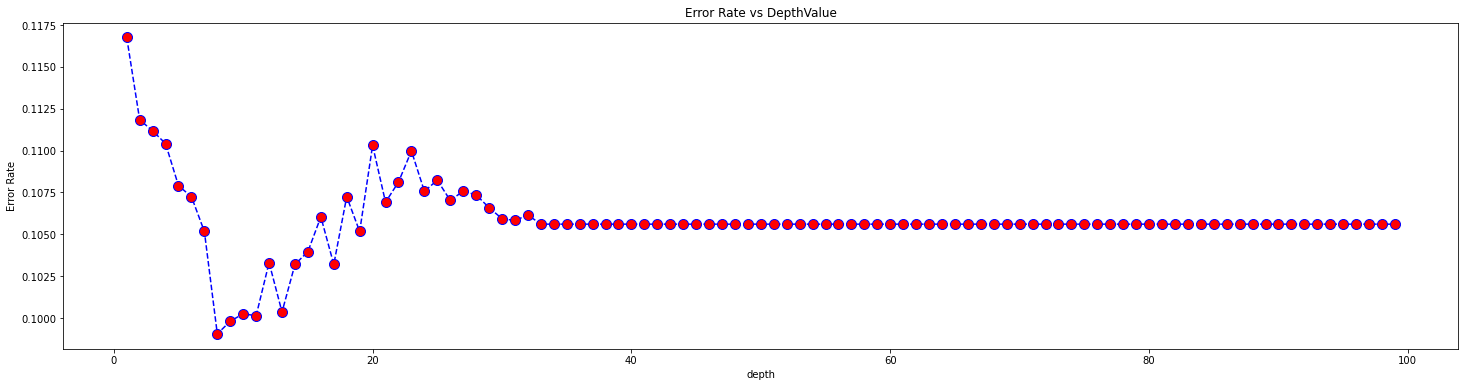

In [38]:
plt.figure(figsize=(25,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [40]:
# Create the parameter grid based on the results of random search 
# There are more parameters but they are focusing only in one class to get the best accuracy overall

parameters = {
    'bootstrap': [True,False],
    'max_depth': [8,9,10,11],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_rf.fit(train_m3, train_m3_target)

print (opt_model_rf.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 1/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   1.0s
[CV 2/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 2/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   1.2s
[CV 3/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 3/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   1.1s
[CV 4/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 4/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   1.2s
[CV 5/5; 1/32] START bootstrap=True, max_depth=8, n_estimators=100..............
[CV 5/5; 1/32] END bootstrap=True, max_depth=8, n_estimators=100; total time=   1.2s
[CV 1/5; 2/32] START bootstrap=True, max_depth=8, n_estimators=200..............
[CV 1/5; 2/32] END bootstra

[CV 5/5; 10/32] END bootstrap=True, max_depth=10, n_estimators=200; total time=   2.8s
[CV 1/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 1/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   4.3s
[CV 2/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 2/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   3.8s
[CV 3/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 3/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   3.8s
[CV 4/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 4/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   4.2s
[CV 5/5; 11/32] START bootstrap=True, max_depth=10, n_estimators=300............
[CV 5/5; 11/32] END bootstrap=True, max_depth=10, n_estimators=300; total time=   3.8s
[CV 1/5; 12/32] START bootstrap=True, max_depth=10, n_estimators=1000....

[CV 4/5; 20/32] END bootstrap=False, max_depth=8, n_estimators=1000; total time=  12.8s
[CV 5/5; 20/32] START bootstrap=False, max_depth=8, n_estimators=1000...........
[CV 5/5; 20/32] END bootstrap=False, max_depth=8, n_estimators=1000; total time=  13.2s
[CV 1/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100............
[CV 1/5; 21/32] END bootstrap=False, max_depth=9, n_estimators=100; total time=   1.2s
[CV 2/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100............
[CV 2/5; 21/32] END bootstrap=False, max_depth=9, n_estimators=100; total time=   1.2s
[CV 3/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100............
[CV 3/5; 21/32] END bootstrap=False, max_depth=9, n_estimators=100; total time=   1.2s
[CV 4/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100............
[CV 4/5; 21/32] END bootstrap=False, max_depth=9, n_estimators=100; total time=   1.2s
[CV 5/5; 21/32] START bootstrap=False, max_depth=9, n_estimators=100...

[CV 3/5; 30/32] END bootstrap=False, max_depth=11, n_estimators=200; total time=   2.9s
[CV 4/5; 30/32] START bootstrap=False, max_depth=11, n_estimators=200...........
[CV 4/5; 30/32] END bootstrap=False, max_depth=11, n_estimators=200; total time=   2.8s
[CV 5/5; 30/32] START bootstrap=False, max_depth=11, n_estimators=200...........
[CV 5/5; 30/32] END bootstrap=False, max_depth=11, n_estimators=200; total time=   2.9s
[CV 1/5; 31/32] START bootstrap=False, max_depth=11, n_estimators=300...........
[CV 1/5; 31/32] END bootstrap=False, max_depth=11, n_estimators=300; total time=   4.4s
[CV 2/5; 31/32] START bootstrap=False, max_depth=11, n_estimators=300...........
[CV 2/5; 31/32] END bootstrap=False, max_depth=11, n_estimators=300; total time=   4.4s
[CV 3/5; 31/32] START bootstrap=False, max_depth=11, n_estimators=300...........
[CV 3/5; 31/32] END bootstrap=False, max_depth=11, n_estimators=300; total time=   6.0s
[CV 4/5; 31/32] START bootstrap=False, max_depth=11, n_estimators=3

#### Create and fit the model

In [41]:
# Create model with best parameters
rf_best_model = RandomForestClassifier(max_depth=11, n_estimators=200)

# Fit the best model
rf_best_model.fit(train_m3, train_m3_target)
rf_best_model

RandomForestClassifier(max_depth=11, n_estimators=200)

In [42]:
predictions = rf_best_model.predict(test_m3)

# Confusion matrix
confusion = pd.crosstab(test_m3_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted     0     1   All
Actual                     
0          7501   459  7960
1           456   731  1187
All        7957  1190  9147


In [43]:
# Accuracy
score = accuracy_score(test_m3_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.899967


In [44]:
# Report
print(classification_report(test_m3_target,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7960
           1       0.61      0.62      0.62      1187

    accuracy                           0.90      9147
   macro avg       0.78      0.78      0.78      9147
weighted avg       0.90      0.90      0.90      9147



In [45]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m3, train_m3_target, cv = 5).mean()
pecc_rf

0.8894761952835715

### Model 4
#### Read CSV

In [46]:
train_m4 = pd.read_csv('../../../../Data_AA2/train_m4.csv', sep = ',')
train_m4.head()

,job,marital,education,default,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.757488,-0.283481,-0.812989,1.940072,1.31813,1.429549,-0.200356,0.197179,-0.349939,0.191532,0.653884,0.723327,0.876216,0.718640,0.340139,0
1,1.191788,1.357360,-0.345204,-0.515014,-0.75865,-0.718276,-0.561003,0.197179,-0.349939,0.191532,-1.183043,-1.172106,-1.229853,-1.356818,-0.922844,0
2,1.470256,1.357360,1.058149,-0.515014,-0.75865,-0.718276,0.160290,0.197179,-0.349939,0.191532,0.843911,-0.223529,0.940688,0.778940,0.850005,0
3,0.077916,-0.283481,1.058149,-0.515014,-0.75865,-1.434217,-0.561003,0.197179,-0.349939,0.191532,-0.106224,-0.643588,-0.327252,0.237966,0.406105,0
4,0.634852,1.357360,-0.812989,1.940072,-0.75865,-0.718276,0.520936,0.197179,-0.349939,0.191532,0.843911,0.592489,-0.477685,0.777217,0.850005,0


In [47]:
test_m4 = pd.read_csv('../../../../Data_AA2/test_m4.csv', sep = ',')
test_m4.head()

,job,marital,education,default,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.757488,-0.283481,-1.748558,-0.515014,-0.75865,-0.002334,-0.200356,0.197179,-0.349939,0.191532,0.843911,0.592489,-0.477685,0.778366,0.850005,0
1,1.470256,-0.283481,-1.748558,1.940072,1.31813,-1.434217,-0.561003,0.197179,-0.349939,0.191532,0.843911,1.534180,-0.284271,0.769751,0.850005,0
2,-1.035956,-0.283481,1.058149,-0.515014,-0.75865,1.429549,0.160290,0.197179,-0.349939,0.191532,0.843911,-0.223529,0.940688,0.779514,0.850005,0
3,-1.035956,-0.283481,-0.345204,1.940072,1.31813,-1.434217,-0.561003,0.197179,-0.349939,0.191532,0.653884,0.723327,0.876216,0.716917,0.340139,0
4,0.913320,-1.924321,-1.280773,1.940072,1.31813,-1.434217,0.520936,0.197179,-0.349939,0.191532,0.843911,0.592489,-0.477685,0.775494,0.850005,0


In [48]:
#get target
train_m4_target = train_m4['y']
train_m4 = train_m4.drop(columns=['y'])

In [49]:
#get target
test_m4_target = test_m4['y']
test_m4 = test_m4.drop(columns=['y'])

### Check for lower errors

In [50]:
error_rate = []

for i in tqdm(range(1,100)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m4,train_m4_target)
    predictions = clf.predict(test_m4)
    error_rate.append(np.mean(predictions != test_m4_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [04:13<00:00,  2.56s/it]


Text(0, 0.5, 'Error Rate')

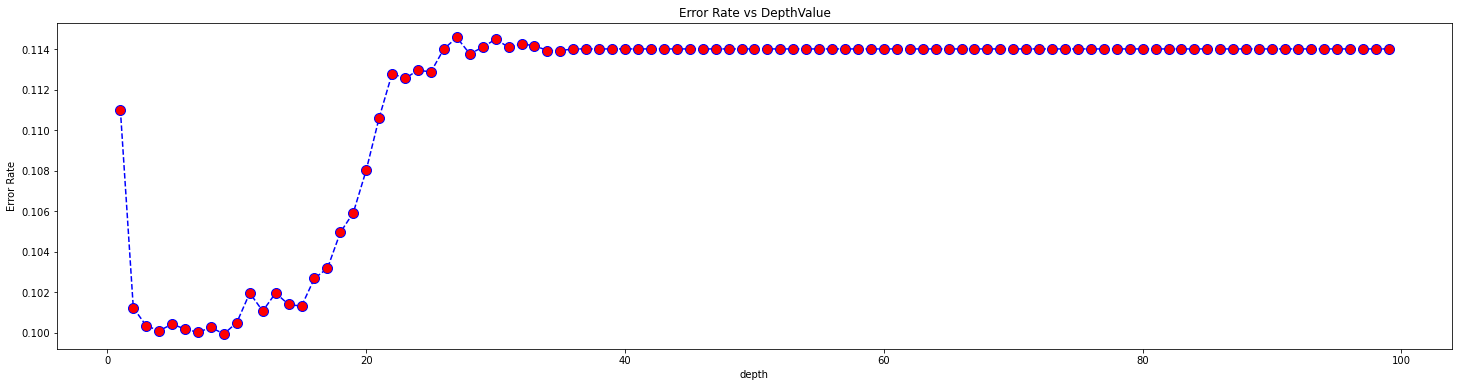

In [51]:
plt.figure(figsize=(25,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [52]:
# Create the parameter grid based on the results of random search 
# There are more parameters but they are focusing only in one class to get the best accuracy overall

parameters = {
    'bootstrap': [True,False],
    'max_depth': [3,4,6,7],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_rf.fit(train_m4, train_m4_target)

print (opt_model_rf.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START bootstrap=True, max_depth=3, n_estimators=100..............
[CV 1/5; 1/32] END bootstrap=True, max_depth=3, n_estimators=100; total time=   0.5s
[CV 2/5; 1/32] START bootstrap=True, max_depth=3, n_estimators=100..............
[CV 2/5; 1/32] END bootstrap=True, max_depth=3, n_estimators=100; total time=   0.5s
[CV 3/5; 1/32] START bootstrap=True, max_depth=3, n_estimators=100..............
[CV 3/5; 1/32] END bootstrap=True, max_depth=3, n_estimators=100; total time=   0.5s
[CV 4/5; 1/32] START bootstrap=True, max_depth=3, n_estimators=100..............
[CV 4/5; 1/32] END bootstrap=True, max_depth=3, n_estimators=100; total time=   0.6s
[CV 5/5; 1/32] START bootstrap=True, max_depth=3, n_estimators=100..............
[CV 5/5; 1/32] END bootstrap=True, max_depth=3, n_estimators=100; total time=   0.8s
[CV 1/5; 2/32] START bootstrap=True, max_depth=3, n_estimators=200..............
[CV 1/5; 2/32] END bootstra

[CV 5/5; 10/32] END bootstrap=True, max_depth=6, n_estimators=200; total time=   2.1s
[CV 1/5; 11/32] START bootstrap=True, max_depth=6, n_estimators=300.............
[CV 1/5; 11/32] END bootstrap=True, max_depth=6, n_estimators=300; total time=   3.1s
[CV 2/5; 11/32] START bootstrap=True, max_depth=6, n_estimators=300.............
[CV 2/5; 11/32] END bootstrap=True, max_depth=6, n_estimators=300; total time=   3.0s
[CV 3/5; 11/32] START bootstrap=True, max_depth=6, n_estimators=300.............
[CV 3/5; 11/32] END bootstrap=True, max_depth=6, n_estimators=300; total time=   3.1s
[CV 4/5; 11/32] START bootstrap=True, max_depth=6, n_estimators=300.............
[CV 4/5; 11/32] END bootstrap=True, max_depth=6, n_estimators=300; total time=   3.0s
[CV 5/5; 11/32] START bootstrap=True, max_depth=6, n_estimators=300.............
[CV 5/5; 11/32] END bootstrap=True, max_depth=6, n_estimators=300; total time=   3.2s
[CV 1/5; 12/32] START bootstrap=True, max_depth=6, n_estimators=1000...........

[CV 4/5; 20/32] END bootstrap=False, max_depth=3, n_estimators=1000; total time=   7.4s
[CV 5/5; 20/32] START bootstrap=False, max_depth=3, n_estimators=1000...........
[CV 5/5; 20/32] END bootstrap=False, max_depth=3, n_estimators=1000; total time=   7.7s
[CV 1/5; 21/32] START bootstrap=False, max_depth=4, n_estimators=100............
[CV 1/5; 21/32] END bootstrap=False, max_depth=4, n_estimators=100; total time=   0.8s
[CV 2/5; 21/32] START bootstrap=False, max_depth=4, n_estimators=100............
[CV 2/5; 21/32] END bootstrap=False, max_depth=4, n_estimators=100; total time=   0.8s
[CV 3/5; 21/32] START bootstrap=False, max_depth=4, n_estimators=100............
[CV 3/5; 21/32] END bootstrap=False, max_depth=4, n_estimators=100; total time=   1.0s
[CV 4/5; 21/32] START bootstrap=False, max_depth=4, n_estimators=100............
[CV 4/5; 21/32] END bootstrap=False, max_depth=4, n_estimators=100; total time=   0.8s
[CV 5/5; 21/32] START bootstrap=False, max_depth=4, n_estimators=100...

[CV 3/5; 30/32] END bootstrap=False, max_depth=7, n_estimators=200; total time=   2.6s
[CV 4/5; 30/32] START bootstrap=False, max_depth=7, n_estimators=200............
[CV 4/5; 30/32] END bootstrap=False, max_depth=7, n_estimators=200; total time=   2.4s
[CV 5/5; 30/32] START bootstrap=False, max_depth=7, n_estimators=200............
[CV 5/5; 30/32] END bootstrap=False, max_depth=7, n_estimators=200; total time=   2.6s
[CV 1/5; 31/32] START bootstrap=False, max_depth=7, n_estimators=300............
[CV 1/5; 31/32] END bootstrap=False, max_depth=7, n_estimators=300; total time=   4.1s
[CV 2/5; 31/32] START bootstrap=False, max_depth=7, n_estimators=300............
[CV 2/5; 31/32] END bootstrap=False, max_depth=7, n_estimators=300; total time=   4.0s
[CV 3/5; 31/32] START bootstrap=False, max_depth=7, n_estimators=300............
[CV 3/5; 31/32] END bootstrap=False, max_depth=7, n_estimators=300; total time=   3.8s
[CV 4/5; 31/32] START bootstrap=False, max_depth=7, n_estimators=300.....

#### Create and fit the model

In [53]:
# Create model with best parameters
rf_best_model = RandomForestClassifier(max_depth=7, n_estimators=200)

# Fit the best model
rf_best_model.fit(train_m4, train_m4_target)
rf_best_model

RandomForestClassifier(max_depth=7, n_estimators=200)

In [54]:
predictions = rf_best_model.predict(test_m4)

# Confusion matrix
confusion = pd.crosstab(test_m4_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0    1    All
Actual                      
0          10844  141  10985
1           1099  273   1372
All        11943  414  12357


In [55]:
# Accuracy
score = accuracy_score(test_m4_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.899652


In [56]:
# Report
print(classification_report(test_m4_target,predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10985
           1       0.66      0.20      0.31      1372

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.63     12357
weighted avg       0.88      0.90      0.87     12357



In [57]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m4, train_m4_target, cv = 5).mean()
pecc_rf

0.9007664140482337

### Model 5
#### Read CSV

In [58]:
train_m5 = pd.read_csv('../../../../Data_AA2/train_m5.csv', sep = ',')
train_m5.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.542856,-1.154683,1.504582,1.376593,0.689601,-0.010201,0.928497,-0.429774,-0.758480,1.194001,...,-0.204674,-5.083824,1.660200,2.938971,-1.947193,-0.804593,2.226079,-1.425183,-2.064840,1.0
1,-0.506227,-0.963193,-0.754426,1.376593,-1.766225,-0.010201,0.928497,-0.429774,-0.758480,-0.531893,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,-0.539387,0.760455,0.845530,0.0
2,-1.116306,1.334690,1.504582,-1.926794,1.180766,-0.010201,-1.077009,2.326804,1.318426,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
3,-1.179061,-0.197232,-1.036802,-0.275101,1.180766,-0.010201,0.928497,2.326804,1.318426,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
4,0.880355,-0.388722,-0.754426,1.376593,0.689601,-0.010201,0.928497,-0.429774,-0.758480,0.762528,...,-0.560688,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0


In [59]:
test_m5 = pd.read_csv('../../../../Data_AA2/test_m5.csv', sep = ',')
test_m5.head()

,level_0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,0.090003,0.939830,-0.275101,-0.292730,-0.010201,0.928497,-0.429774,1.318426,0.762528,...,0.507356,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
1,2,-0.580213,-1.036802,1.376593,-0.292730,-0.010201,-1.077009,-0.429774,-0.758480,0.762528,...,2.287429,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0
2,3,0.760219,-0.754426,-0.275101,-1.275060,-0.010201,0.928497,-0.429774,-0.758480,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0
3,4,3.153847,0.375078,-1.926794,-1.766225,-0.010201,-1.077009,2.326804,-0.758480,-1.826313,...,-0.560688,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.390299,-1.425183,-0.942269,1.0
4,5,1.813416,0.375078,-0.275101,0.689601,-0.010201,-1.077009,-0.429774,-0.758480,-1.394840,...,-0.560688,0.196704,-0.351282,0.193233,0.763192,-0.804593,0.949710,0.760455,0.845530,0.0


In [60]:
#get target
train_m5 = train_m5.drop(columns=['index'])
train_m5_target = train_m5['y']
train_m5 = train_m5.drop(columns=['y'])

In [61]:
#get target
test_m5 = test_m5.drop(columns=['level_0'])
test_m5_target = test_m5['y']
test_m5 = test_m5.drop(columns=['y'])

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,100)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m5,train_m5_target)
    predictions = clf.predict(test_m5)
    error_rate.append(np.mean(predictions != test_m5_target))

 21%|█████████████████▍                                                                | 21/99 [00:49<04:02,  3.10s/it]

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
# There are more parameters but they are focusing only in one class to get the best accuracy overall

parameters = {
    'bootstrap': [True,False],
    'max_depth': [11,12,13,14],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_rf.fit(train_m5, train_m5_target)

print (opt_model_rf.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
rf_best_model = RandomForestClassifier()

# Fit the best model
rf_best_model.fit(train_m5, train_m5_target)
rf_best_model

In [ ]:
predictions = rf_best_model.predict(test_m5)

# Confusion matrix
confusion = pd.crosstab(test_m5_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m5_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m5_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m5, train_m5_target, cv = 5).mean()
pecc_rf